In [14]:
import torch 
import numpy as np
import glob
from skimage import io
from src.datamodules.components.focus_dataset import FocusDataset
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import os

In [7]:
def brenner_gradient(img: np.array) -> int:
        return np.sum((img[2:]-img[:-2])**2)

In [58]:
d = torch.load("/home/maf4031/focus_model/data/datasets/dataset_subsample100_grid_new.pt")
len(d)

306756

In [68]:
sample_num = 20
path = f"/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_{sample_num}"
img_paths = glob.glob(f"{path}/distance*")
len(img_paths)

1000

In [69]:
patch_size = (360, 256)
img = io.imread(os.path.join(path, "distance0.jpg"))
h, w, _ = img.shape
x_steps = int(h / patch_size[0])
y_steps = int(w / patch_size[1])
x_coord = np.linspace(int(patch_size[0]/2), h - int(patch_size[0]/2), x_steps)
y_coord = np.linspace(int(patch_size[1]/2), w - int(patch_size[1]/2), y_steps)

patch_coord = [(x, y) for x in x_coord for y in y_coord]

In [70]:
max_img_path_list = []
for x, y in patch_coord:
    max_brenner = 0
    max_img_path = None
    for img_path in img_paths:
        img = io.imread(img_path)
        curr_brenner = brenner_gradient(img[int(x-int(patch_size[0]/2)):int(x+int(patch_size[0]/2)), int(y-int(patch_size[1]/2)):int(y+int(patch_size[1]/2))])
        if curr_brenner > max_brenner:
            max_brenner = curr_brenner
            max_img_path = img_path
    max_img_path_list.append(max_img_path.split("distance")[1].split(".")[0])

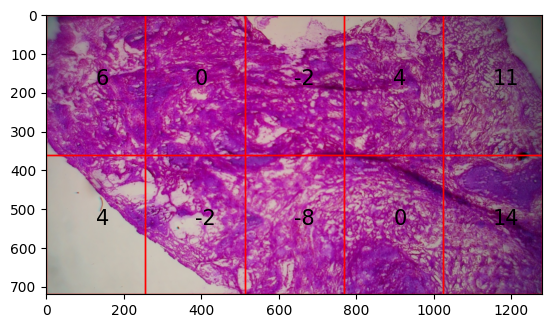

In [71]:
fig, ax = plt.subplots(1)
ax.imshow(img)
for x, y in patch_coord:
    rect = patches.Rectangle((y-int(patch_size[1]/2), x-int(patch_size[0]/2)), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(y, x, max_img_path_list[patch_coord.index((x,y))], color='black', fontsize=15)
plt.show()

In [65]:
patch_coord = [(patch[-2], patch[-1]) for patch in d.array_images if patch[0].split("/")[-2] == f"sample_{sample_num}"]
(len(patch_coord))

5519

In [66]:
max_brenner_list = []
max_img_path_list = []
check_list = []
check_brenner_list = []
for x,y in patch_coord[:1]:
    max_brenner = 0
    max_img_path = None
    check_max_brenner = 0
    check_max_img = None
    for img_path in img_paths:
        img = io.imread(img_path)
        curr_brenner = brenner_gradient(img[int(x-int(patch_size[0]/2)):int(x+int(patch_size[0]/2)), int(y-int(patch_size[1]/2)):int(y+int(patch_size[1]/2))])
        check_brenner = brenner_gradient(img)
        if curr_brenner > max_brenner:
            max_brenner = curr_brenner
            max_img_path = img_path
        if check_brenner > check_max_brenner:
            check_max_brenner = check_brenner
            check_max_img = img_path
    check_list.append(check_max_img)
    check_brenner_list.append(check_max_brenner)
    max_brenner_list.append(max_brenner)
    max_img_path_list.append(max_img_path)

In [67]:
check_list

['/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_30/distance0.jpg']

In [13]:
max_img_path_list

['/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance5.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance0.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance-2.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance4.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance9.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance6.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance-6.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance-9.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance5.jpg',
 '/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_12/distance0.jpg']

In [32]:
i = io.imread("/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_3_4/sample_13/distance0.jpg")

In [33]:
brenner_gradient(i)

36678625

In [2]:
720/2

360.0